## Final Project: Finding a Quiet and Safe Place to Live

### By Billy Cole

My project is the columination of my need to find a quiet residential neighborhood in NYC. Which happens to be a very difficult feat. I will also compare the safest neighbour hoods by taking in the entire year of crime statistics. Incorperating the 311 data that is open to all from [Open Data](https://opendata.cityofnewyork.us/).

I tried to use the entire year with from the 311 database, the file ended up being massive **(1+ gigs)** so I instead utilized the April of 2017 and April of 2016. The crime data was a much more managable 28mb for the entire year of crime statstics 2016-2017.

I had tried to use the API, kept on getting server errors. So instead I used two relational databases.

In [31]:
import numpy as np
import pandas as pd
import datetime
import json
import urllib.request
import seaborn as sns
import open311SNSL
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
from geojson import Feature, Point, FeatureCollection
%matplotlib inline

##### Relational Data Base - 311:

In [32]:
noise417 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/Noise_Complaints_April_2017.csv',sep=',')
noise417

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,35835573,4/1/17 0:01,4/1/17 0:28,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10467.0,07 BRONX,BRONX,1018412.0,259598.0,40.879145,-73.876464,"(40.879144669133176, -73.87646438522717)"
1,35838142,4/1/17 0:04,4/1/17 0:12,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10455.0,01 BRONX,BRONX,1010131.0,236205.0,40.814966,-73.906500,"(40.81496598157052, -73.90650015950133)"
2,35833590,4/1/17 0:05,4/1/17 9:37,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11101.0,02 QUEENS,QUEENS,995645.0,210208.0,40.743642,-73.958878,"(40.74364166035955, -73.95887755839249)"
3,35834330,4/1/17 0:05,4/1/17 8:49,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11226.0,14 BROOKLYN,BROOKLYN,995665.0,175149.0,40.647413,-73.958865,"(40.64741283883138, -73.9588647959135)"
4,35838814,4/1/17 0:05,4/1/17 4:55,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10003.0,06 MANHATTAN,MANHATTAN,989682.0,206744.0,40.734140,-73.980400,"(40.73413951274722, -73.98039971548371)"
5,35838072,4/1/17 0:06,4/1/17 1:26,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,05 MANHATTAN,MANHATTAN,988150.0,216378.0,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"
6,35844431,4/1/17 0:07,4/4/17 22:03,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,10452.0,04 BRONX,BRONX,1003936.0,242233.0,40.831527,-73.928863,"(40.8315271048226, -73.92886303221528)"
7,35838767,4/1/17 0:07,4/1/17 9:33,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11374.0,06 QUEENS,QUEENS,1024435.0,203462.0,40.725042,-73.855020,"(40.72504161746349, -73.85502020259588)"
8,35833644,4/1/17 0:07,4/1/17 3:47,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11224.0,13 BROOKLYN,BROOKLYN,989317.0,149885.0,40.578074,-73.981759,"(40.5780742789993, -73.98175946661651)"
9,35835078,4/1/17 0:07,4/1/17 1:38,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,10128.0,08 MANHATTAN,MANHATTAN,997105.0,224266.0,40.782225,-73.953582,"(40.78222524276318, -73.95358180659666)"


In [33]:
noise416 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/Noise_Complaints_April_2016.csv',sep=',')
noise416

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,33029766,4/1/16 0:00,4/1/16 3:16,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10013.0,02 MANHATTAN,MANHATTAN,984789.0,201439.0,40.719580,-73.998056,"(40.719580230801505, -73.99805555128263)"
1,33027503,4/1/16 0:00,4/1/16 3:22,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11419.0,09 QUEENS,QUEENS,1033416.0,190890.0,40.690489,-73.822710,"(40.69048916332186, -73.82271035152993)"
2,33032781,4/1/16 0:00,4/1/16 0:58,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10472.0,09 BRONX,BRONX,1021321.0,241894.0,40.830541,-73.866043,"(40.830540787241496, -73.86604286404084)"
3,33030527,4/1/16 0:01,4/1/16 0:41,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11213.0,08 BROOKLYN,BROOKLYN,1001866.0,183639.0,40.670706,-73.936497,"(40.67070585152127, -73.93649663946313)"
4,33028792,4/1/16 0:01,4/1/16 8:01,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10463.0,08 BRONX,BRONX,1012064.0,259197.0,40.878066,-73.899421,"(40.878066337687855, -73.89942147771544)"
5,33031834,4/1/16 0:01,4/1/16 2:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216.0,03 BROOKLYN,BROOKLYN,998318.0,190433.0,40.689360,-73.949273,"(40.68936018629767, -73.94927252609706)"
6,33032642,4/1/16 0:02,4/1/16 5:18,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10301.0,01 STATEN ISLAND,STATEN ISLAND,960931.0,174345.0,40.645183,-74.084030,"(40.64518268959385, -74.08402977438229)"
7,33031760,4/1/16 0:03,4/1/16 7:53,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10031.0,09 MANHATTAN,MANHATTAN,998476.0,240092.0,40.825661,-73.948598,"(40.82566115523861, -73.9485977223673)"
8,33025590,4/1/16 0:03,4/1/16 1:48,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11355.0,07 QUEENS,QUEENS,1031634.0,211584.0,40.747299,-73.828990,"(40.74729882640561, -73.82899044260391)"
9,33029708,4/1/16 0:04,4/1/16 2:59,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10019.0,04 MANHATTAN,MANHATTAN,986141.0,218081.0,40.765258,-73.993174,"(40.76525818394538, -73.99317351705729)"


##### Crime:

In [35]:
crime2016 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/NYPD_Complaint_Data_2016.csv',sep=',')
crime2016

,CMPLNT_NUM,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,898636308,11/15/16,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,MANHATTAN,28,998625.0,230177.0,40.798455,-73.948082,"(40.79845524, -73.948082015)"
1,923594521,11/15/16,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",FELONY,BRONX,40,1007034.0,236608.0,40.816089,-73.917689,"(40.816088874, -73.917688689)"
2,438361610,11/15/16,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,BROOKLYN,88,993934.0,188677.0,40.684554,-73.965085,"(40.684554464, -73.965084645)"
3,586989382,11/15/16,GRAND LARCENY,"LARCENY,GRAND BY FALSE PROMISE-NOT IN PERSON C...",FELONY,QUEENS,105,1056264.0,205572.0,40.730639,-73.740167,"(40.730639403, -73.740166564)"
4,847841563,11/15/16,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,BRONX,47,1024693.0,261681.0,40.884844,-73.853740,"(40.884843556, -73.85374009)"
5,926516733,11/15/16,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,MANHATTAN,33,1001184.0,246434.0,40.843072,-73.938798,"(40.843071579, -73.938798434)"
6,603982336,11/15/16,GRAND LARCENY,"LARCENY,GRAND FROM PERSON,PICK",FELONY,BRONX,47,1026480.0,262584.0,40.887314,-73.847272,"(40.887313634, -73.847271758)"
7,997144457,11/15/16,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,BROOKLYN,66,988262.0,171679.0,40.637903,-73.985546,"(40.637903085, -73.985545819)"
8,918223352,11/15/16,ADMINISTRATIVE CODE,"ADM.CODE,UNCLASSIFIED MISDEMEA",MISDEMEANOR,QUEENS,115,1016768.0,212894.0,40.750970,-73.882637,"(40.750969834, -73.882637055)"
9,402684356,11/15/16,BURGLARY,"BURGLARY,COMMERCIAL,DAY",FELONY,MANHATTAN,33,999973.0,243933.0,40.836209,-73.943181,"(40.836209301, -73.943181103)"


In [36]:
crime2015 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/NYPD_Complaint_Data_2015.csv',sep=',')
crime2015

,CMPLNT_NUM,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/15,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,BRONX,44.0,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/15,MURDER & NON-NEGL. MANSLAUGHTER,NaN,FELONY,QUEENS,103.0,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/15,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",FELONY,MANHATTAN,28.0,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/15,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,QUEENS,105.0,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/15,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,MANHATTAN,13.0,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/15,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",FELONY,BROOKLYN,71.0,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/15,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",MISDEMEANOR,MANHATTAN,7.0,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/15,DANGEROUS WEAPONS,WEAPONS POSSESSION 1 & 2,FELONY,BRONX,46.0,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/15,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,BRONX,48.0,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/15,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",MISDEMEANOR,MANHATTAN,19.0,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


##### 311 API:

New York's Api utilizes Socrata. Lets get some of the same information through this data source via the API:

In [37]:
import base64
import json

# urllib and urllib2 are included in the Python standard libraries, but must be
# imported differently depending on what version of Python you are on
try:
    # Python 3
    from urllib.request import urlopen, Request
except ImportError:
    # Fallback for Python 2
    from urllib2 import urlopen, request

url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json"

response = urlopen(url)
data = json.loads(response.read().decode('utf-8'))

URLError: <urlopen error [Errno 54] Connection reset by peer>

No matter how I tried, I kept on getting error number 54. Did a lot of research and was unable to utilize the API


### Cleaning Up the Data:

So after looking into some of the zip codes some of the reported zip was NaN. So let's clear that up. Also there is a random outlier on the 2015 data set for Crime.

In [38]:
noise417 = noise417.dropna(subset=['Incident Zip'])
noise416 = noise416.dropna(subset=['Incident Zip'])


### Analysis:

Lets find out the which zipcode has the most complaints, and merge the two years for comparison. Also I'll calculate the net change.

In [39]:
noiseByZip417 = noise417['Incident Zip'].value_counts()
noiseByZip417 = noiseByZip417.rename(columns={'Incident Zip': 'April 2016'})
noiseByZip416 = noise416['Incident Zip'].value_counts()
zipdiff = (noiseByZip417 - noiseByZip416)
noiseByZip = pd.concat([noiseByZip416, noiseByZip417, zipdiff], axis=1, join_axes=[noiseByZip416.index])
noiseByZip = noiseByZip.rename(columns={'Incident Zip': 'April 2016', 0 : 'April 2017', 1 : 'Net Change'})
noiseByZip = noiseByZip.fillna(0)
noiseByZip

,April 2016,April 2017,Net Change
10031.0,657,723.0,66.0
10034.0,650,543.0,-107.0
11226.0,632,662.0,30.0
10040.0,628,495.0,-133.0
11216.0,596,520.0,-76.0
10002.0,591,685.0,94.0
10009.0,568,500.0,-68.0
10001.0,545,269.0,-276.0
10027.0,542,478.0,-64.0
11211.0,534,443.0,-91.0


Let's visualize the information on a bar graph:

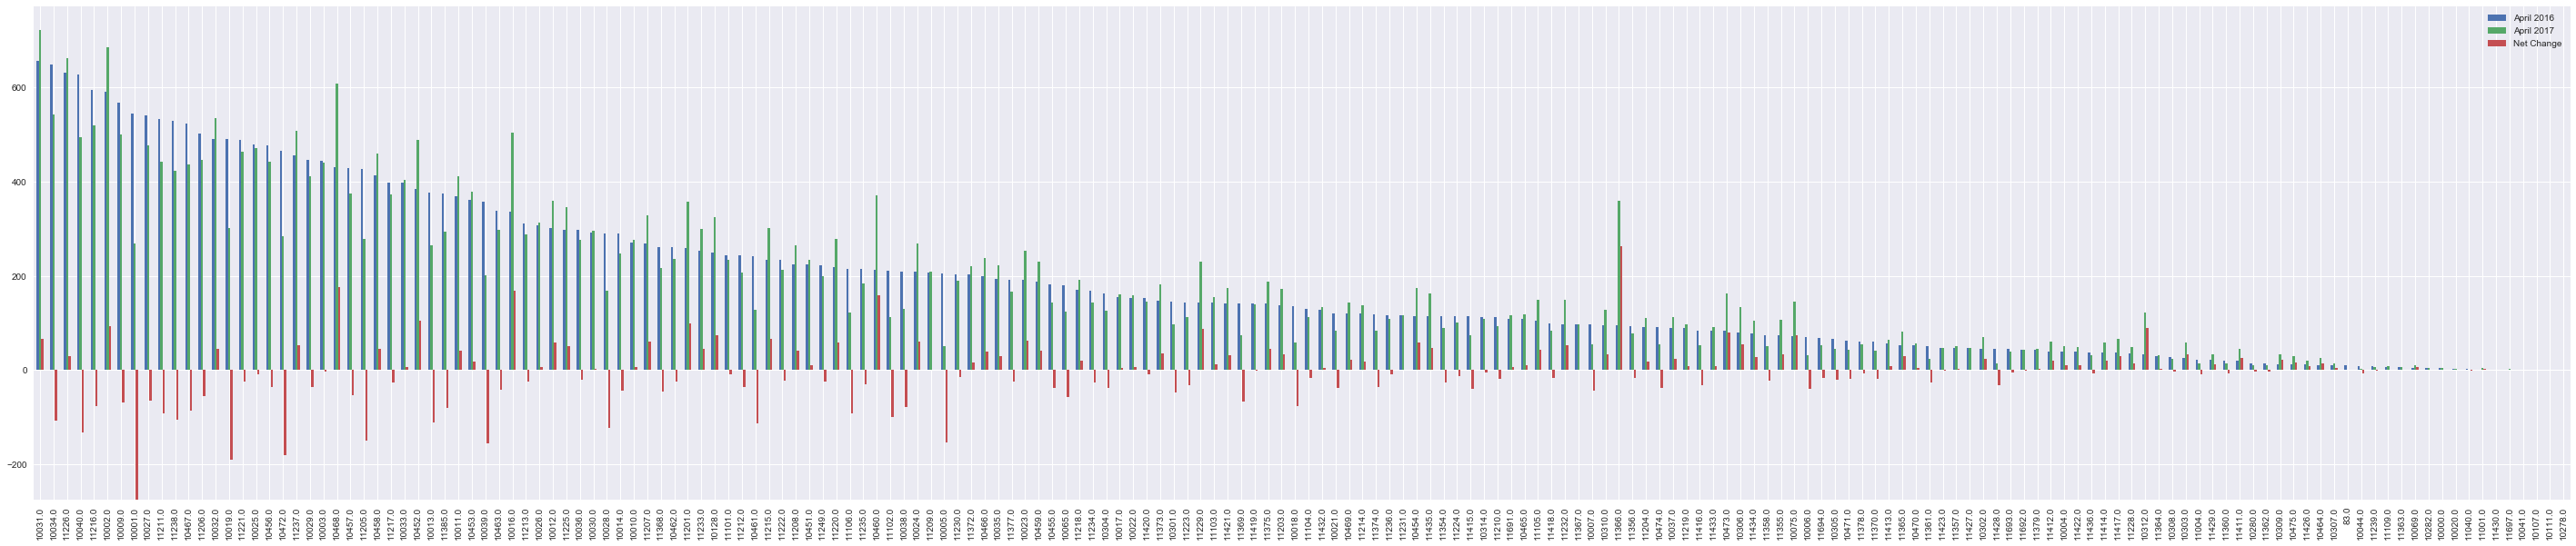

In [40]:
noiseByZip.plot.bar(fontsize=10,figsize= (50, 10))

The information is rather overwhelming in this form so lets narrow down to the top ten greatest drops of complaints over the last year.

In [41]:
noiseByZipDiff10 = noiseByZip.sort_values(by='Net Change', ascending=1)
noiseByZipDiff10 = noiseByZipDiff10.head(n=10)
noiseByZipDiff10

,April 2016,April 2017,Net Change
10001.0,545,269.0,-276.0
10019.0,491,301.0,-190.0
10472.0,466,285.0,-181.0
10039.0,358,202.0,-156.0
10005.0,205,51.0,-154.0
11205.0,427,278.0,-149.0
10040.0,628,495.0,-133.0
10028.0,291,168.0,-123.0
10461.0,241,128.0,-113.0
10013.0,378,266.0,-112.0


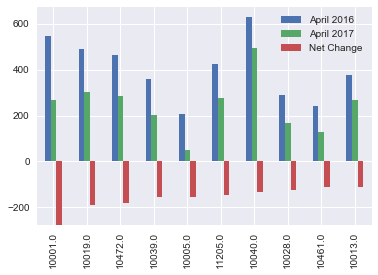

In [42]:
noiseByZipDiff10.plot.bar()

## Geolocation Based Analysis:

So to beter visualize the total complaints in zip codes, I entered the information into tableau:

##### Noise Complaints April 2016:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/Map-2016.png "Noise Complaints 2016")

##### Noise Complaints April 2017:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/Map-2017.png "Noise Complaints 2017")

##### Noise Complaints April Change:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/Map-Diff.png "Noise Complaints Compared")


##### Crime Analysis Per Precinct:

Now lets utilize the precinct system and see which precincts have the most crimes.


In [50]:
crimebyPrecinct2016 = pd.crosstab(crime2016.ADDR_PCT_CD,crime2016.LAW_CAT_CD)
crimebyPrecinct2016['Total Crimes 2016'] = crimebyPrecinct2016.sum(axis=1)
crimebyPrecinct2016

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION,Total Crimes 2016
ADDR_PCT_CD,,,,
1,1843,4158,732,6733
5,1542,2665,488,4695
6,1875,2690,471,5036
7,1278,2807,655,4740
9,1985,3510,625,6120
10,1428,2332,458,4218
13,2535,4035,702,7272
14,3876,6658,737,11271
17,1303,1772,409,3484


In [51]:
crimebyPrecinct2015 = pd.crosstab(crime2015.ADDR_PCT_CD,crime2015.LAW_CAT_CD)
crimebyPrecinct2015['Total Crimes 2015'] = crimebyPrecinct2015.sum(axis=1)
crimebyPrecinct2015

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION,Total Crimes 2015
ADDR_PCT_CD,,,,
1.0,1765,3325,554,5644
5.0,1303,2522,405,4230
6.0,1903,2669,388,4960
7.0,1149,2321,575,4045
9.0,1709,3246,552,5507
10.0,1343,2055,377,3775
13.0,2522,3891,694,7107
14.0,3522,6336,641,10499
17.0,1216,1356,363,2935


Now lets find the difference between the years through a similar calculation to that of the noise complaints.

In [73]:
crimeDiff = pd.concat([crimebyPrecinct2015['Total Crimes 2015'], crimebyPrecinct2016['Total Crimes 2016'],-1*(crimebyPrecinct2015['Total Crimes 2015'] - crimebyPrecinct2016['Total Crimes 2016'])], axis=1, join_axes=[crimebyPrecinct2016.index])
crimeDiff = crimeDiff.rename(columns={0 : 'Net Change'})
crimeDiff = crimeDiff.sort_values(by='Net Change', ascending=1)
crimeDiff

,Total Crimes 2015,Total Crimes 2016,Net Change
ADDR_PCT_CD,,,
103,8518,8169,-349
22,385,339,-46
60,6415,6407,-8
25,7186,7230,44
6,4960,5036,76
62,5874,5975,101
108,4757,4883,126
81,5661,5792,131
112,3324,3456,132


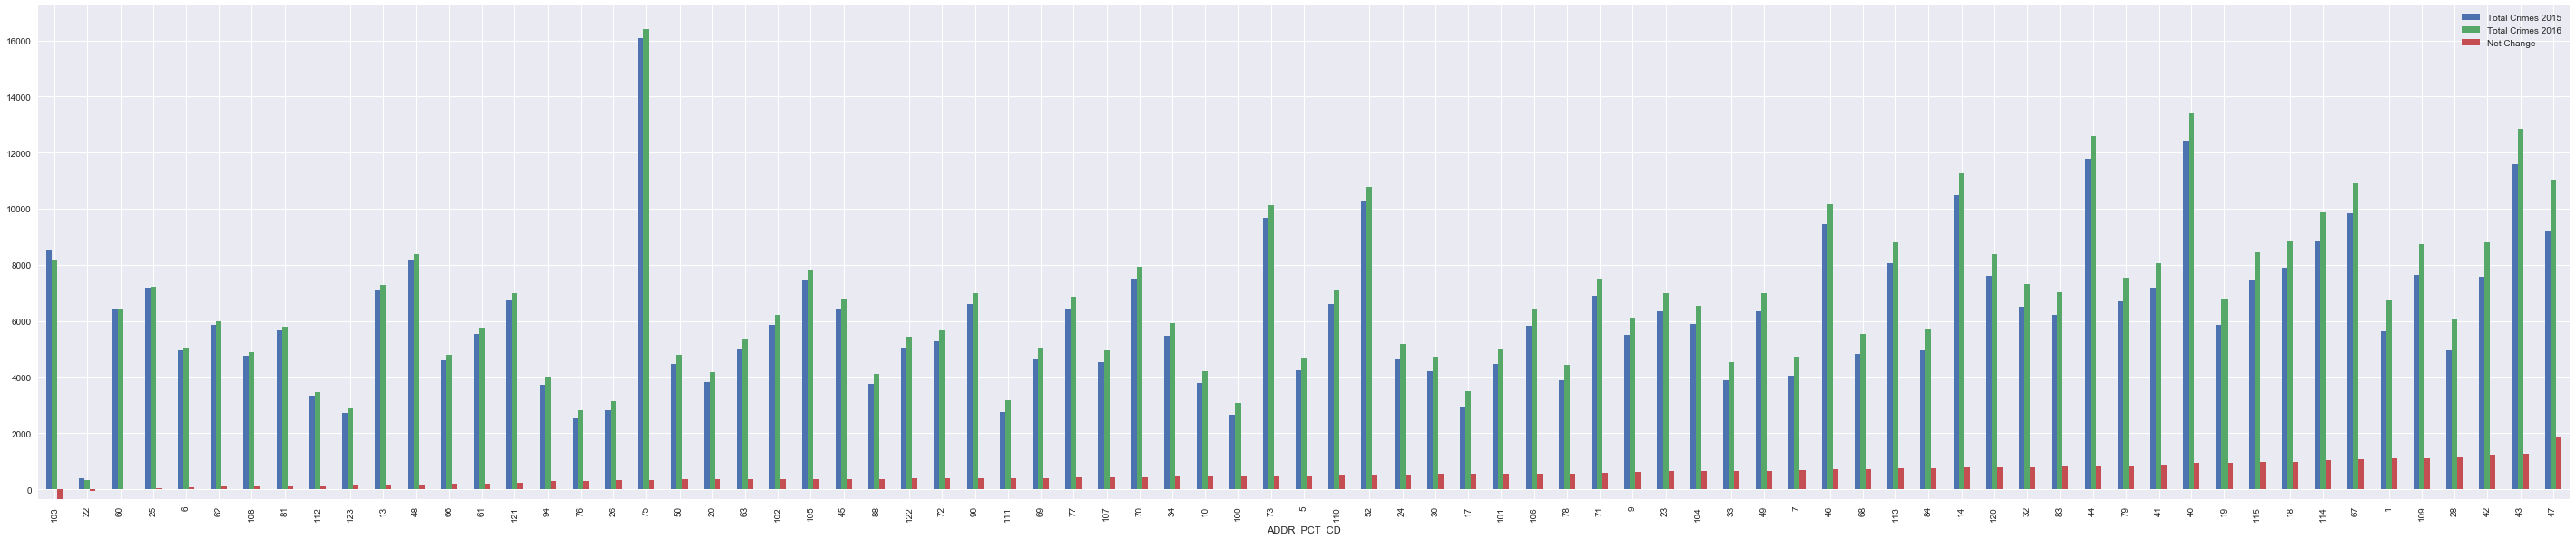

In [74]:
crimeDiff.plot.bar(fontsize=10,figsize= (50, 10))